<a href="https://colab.research.google.com/github/e-abtahi/Statistical_Analysis_Portfolio/blob/main/Project_Axis_Insurance/Axis_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

Key Questions to answer:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?
[Hint- Formulate a hypothesis and prove/disprove it]
3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4.	Is the proportion of smokers significantly different across different regions?
[Hint :
Create a contingency table/cross tab
Use the function : stats.chi2_contingency()]
5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data.

### About the data-

**AxisInsurance.csv** - contains information about customers of the Axis Health Insurance.
1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed by health insurance

## Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.	Univariate Analysis
4.	Bi-Variate Analysis
5.	Variable Transformation / Feature Creation

In [58]:
%matplotlib inline

### Import all the necessary libraries

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [60]:
sns.set() #setting the default seaborn style for our plots

### Read the data into the notebook

In [61]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/insurance.csv') # read the data as a data frame

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### View the first and last 5 rows of the dataset

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the dataset.

In [64]:
df.shape

(1338, 7)

### Check the data types of the columns for the dataset.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Dataset has 1338 rows and 7 columns.

### Fixing the data types

* sex, smoker and region are objects, we can change them to categories.

`coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis`

In [66]:
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

### Check for missing values

In [67]:
df.isna().sum()   #null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no null values in any of the column

### Five point summary of continuous variables

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Data looks legitimate as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the people have 2 or less children
* The claimed amount is higly skewed as most people would require basic medicare and only few suffer from diseases which cost more.

### Summary of categorical variables

In [69]:
df.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* The data contains both male and female insurance holders
* The number of smokers in the data is much less than the non smokers.
* The insurance holders from southeast region of US are more frequent than the others.

## EDA

### Univariate analysis

In [70]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplots and histograms for any input numerical
# variables.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# This will also help us write faster and cleaner code.
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(15,7), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)


    """
    mean = np.mean(data)

    sns.set(font_scale=font_scale) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize) # creating the 2 subplot
    sns.boxplot(data, ax=ax_box2,showmeans=True,color="violet") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2,color="black") # histogram will be made
    ax_hist2.axvline(mean, color='g', linestyle='--') # mean will shown as vertical line in the histogram
    if xlabel: ax_hist2.set(xlabel=xlabel) # xlabel
    if title: ax_box2.set(title=title) # title of the graph
    plt.show() # for plotting the graph

### Age

<ipython-input-70-f818b173f0be>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2,color="black") # histogram will be made


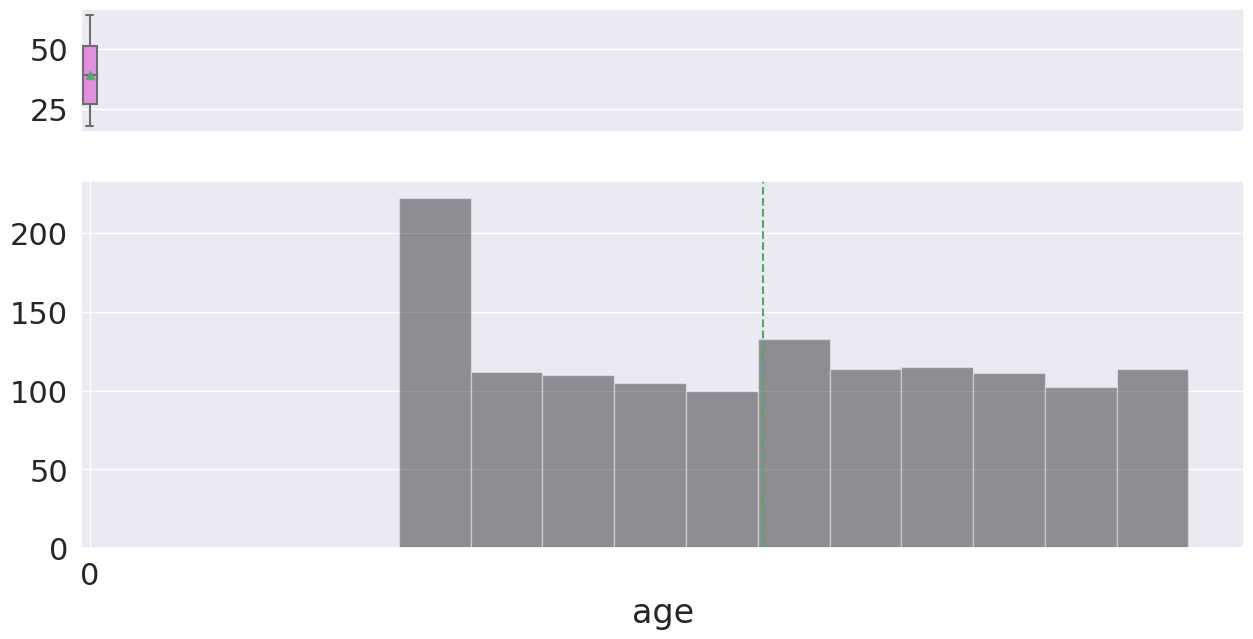

In [71]:
histogram_boxplot(df["age"])

* Age seems uniformly distributed, with both mean and median around 40 years.

### BMI

<ipython-input-70-f818b173f0be>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2,color="black") # histogram will be made


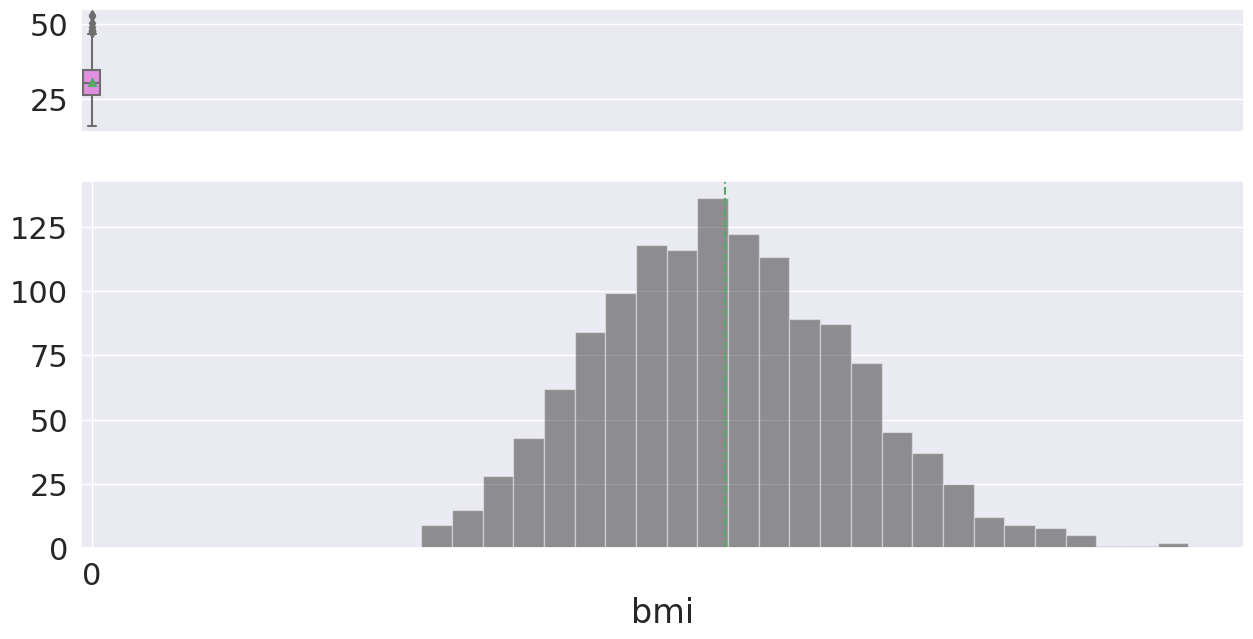

In [72]:
histogram_boxplot(df["bmi"])

* BMI looks to have a fairly normal distribution

### Children

<ipython-input-70-f818b173f0be>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2,color="black") # histogram will be made


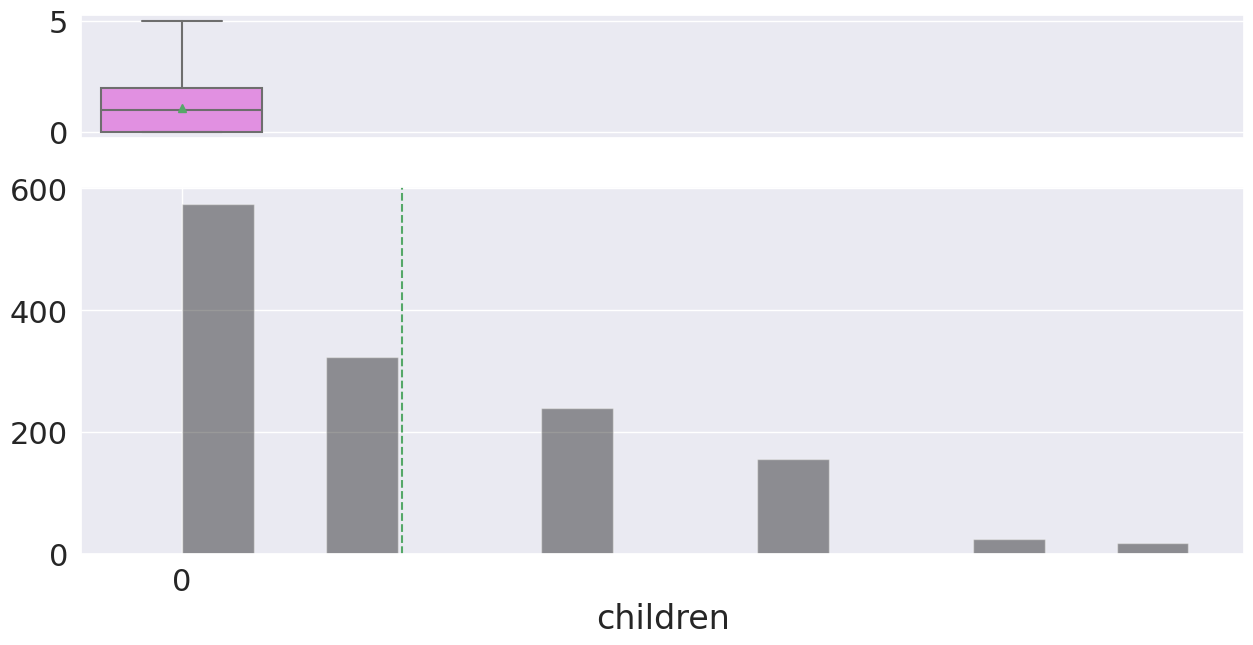

In [73]:
histogram_boxplot(df["children"])

* The number of children has a left skewed distribution.
* The plot suggests that we should convert the children variable to categorical for furthur analysis.

In [74]:
# Converting children to categorical
df['children'] = df['children'].astype('category')

### Charges

<ipython-input-70-f818b173f0be>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2,color="black") # histogram will be made


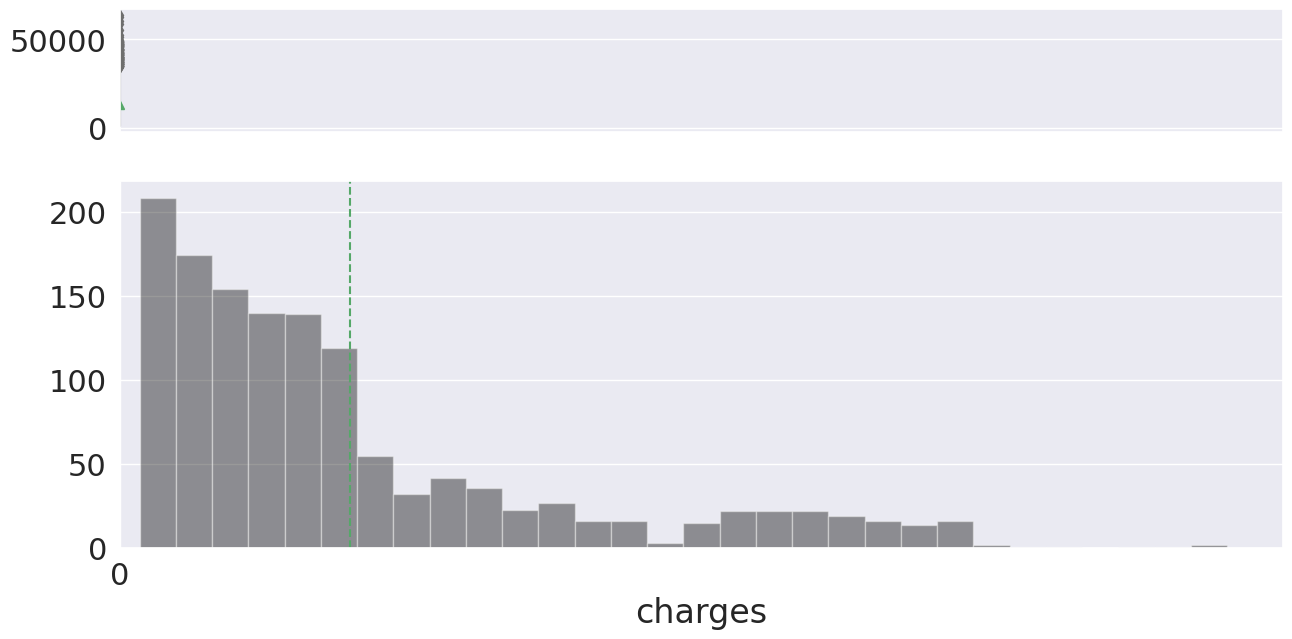

In [75]:
histogram_boxplot(df["charges"])

* Charges have a right skewed distribution. The mean charges is higher than the median charges
* This variable has a lot of outliers towards the higher end indicating that some people spend very high on their medicals.

In [76]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

### Sex

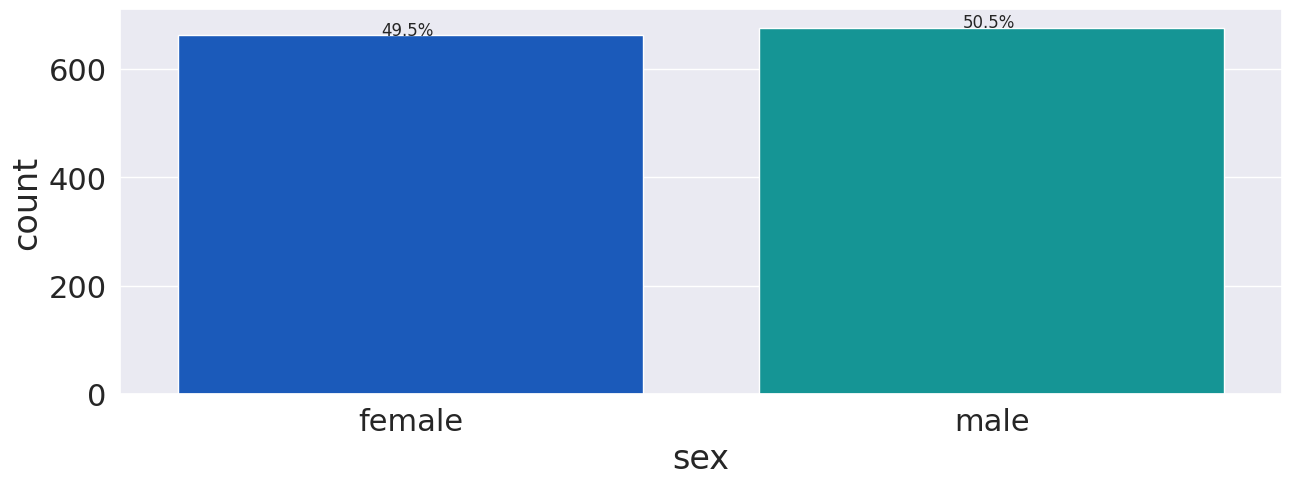

In [77]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x="sex",palette='winter')
perc_on_bar(ax,df["sex"])

* The distribution of observations across genders is fairly similar as we saw earlier as well.

### Children

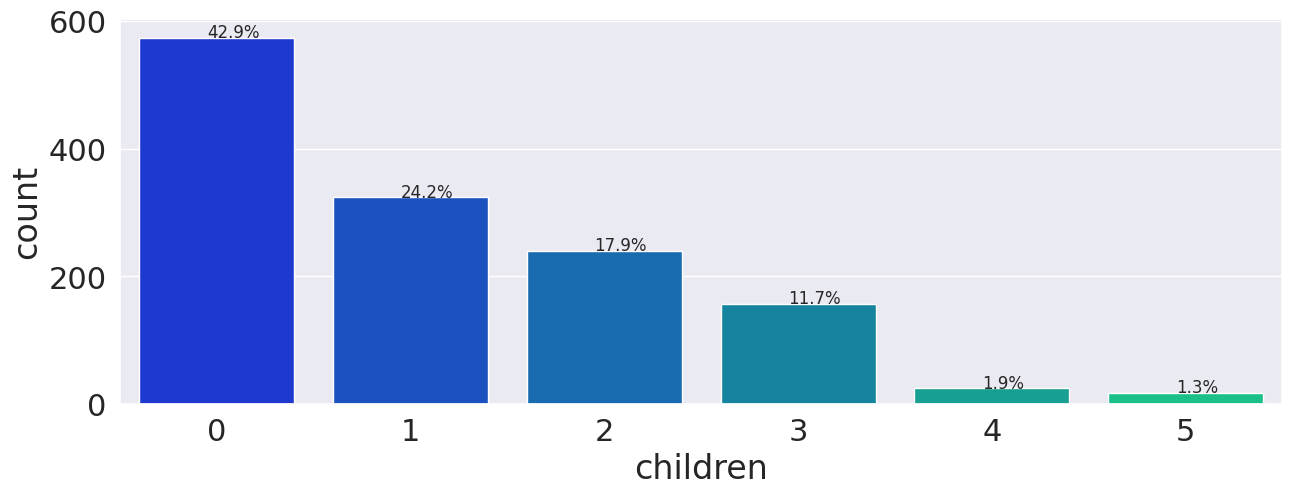

In [78]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x="children",palette='winter')
perc_on_bar(ax,df["children"])

* Nearly 42% insurance holders do not have a child.
* Nearly 42% insurance holders have 1 or 2 children.

### Smoker

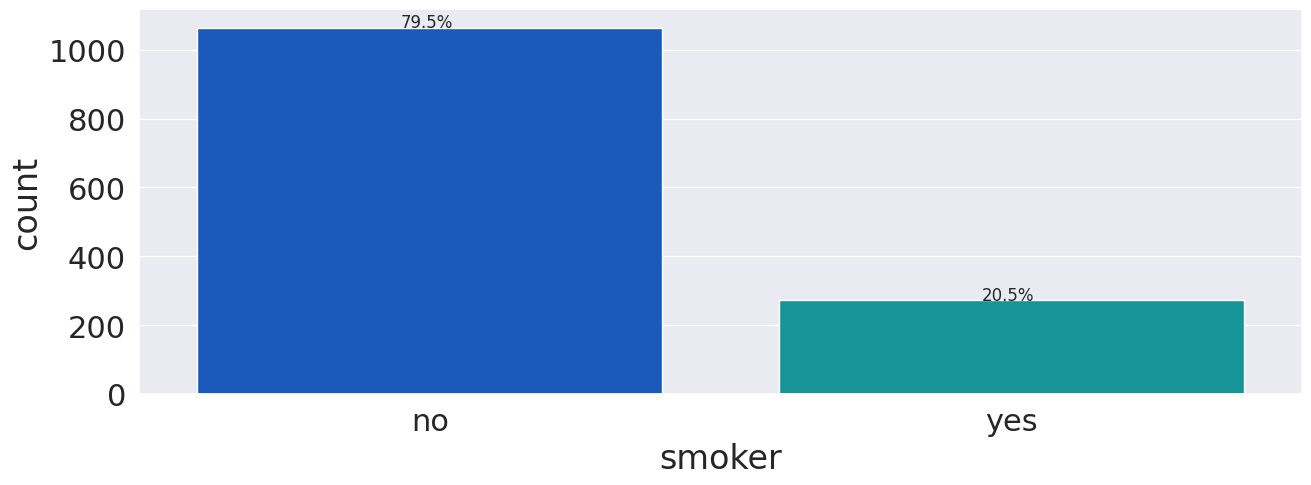

In [79]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x="smoker",palette='winter')
perc_on_bar(ax,df["smoker"])

* 20% of the insurace holders are smokers. It will be interesting to see how smoking affects the insurance claims.

### Region

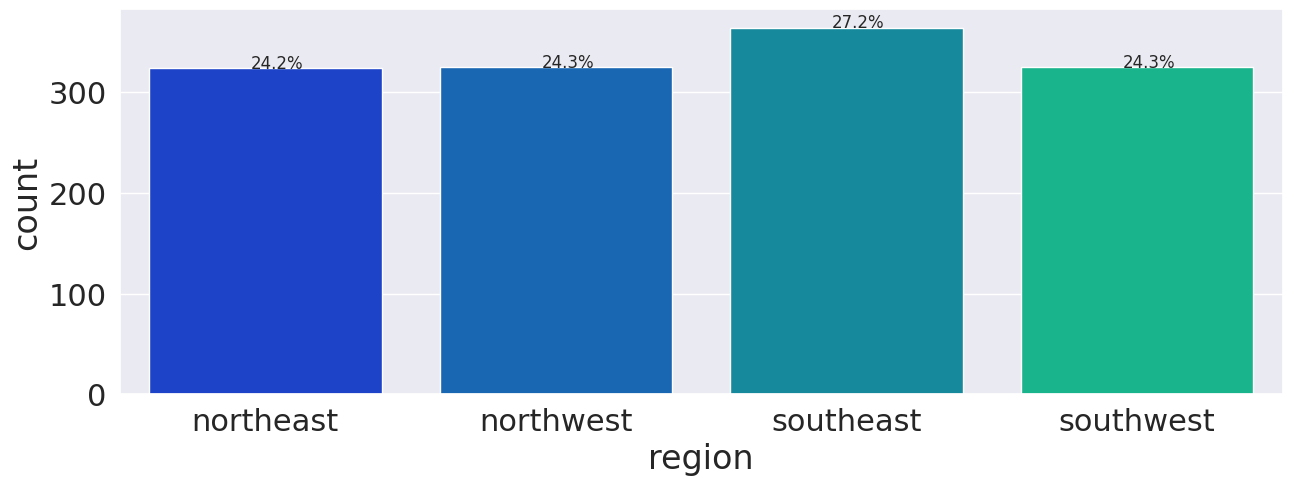

In [80]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x= "region",palette='winter')
perc_on_bar(ax,df["region"])

* The distribution of insurance holders across various regions of US is fairly uniform. South east region does have ~3% more observations as compared to others but we will have to test if this difference is statistically significant.  

### Bivariate Analysis

<ipython-input-81-0ce5ba47e999>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


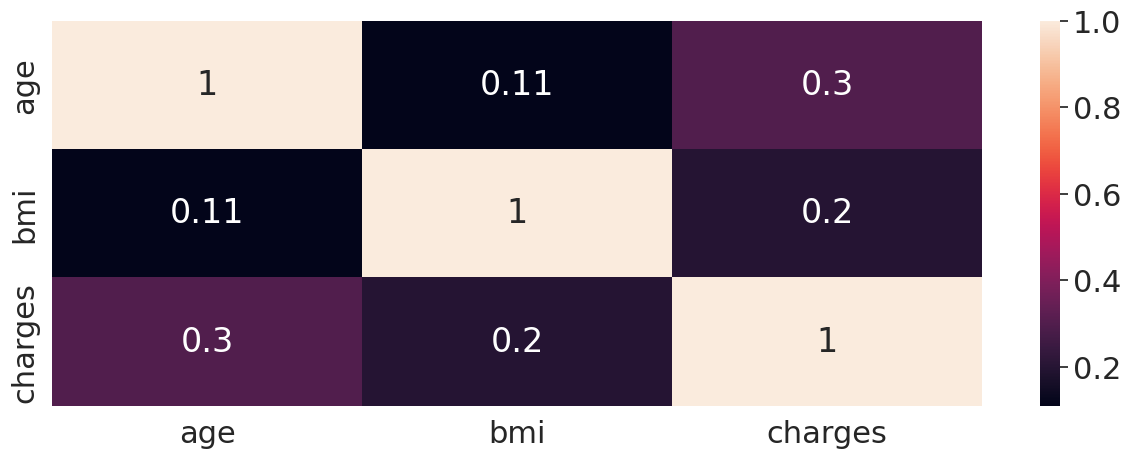

In [81]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

* The correlation between between all the continuous variables is positive but not very high.

### Bi-variate distribution of every possible attribute pair

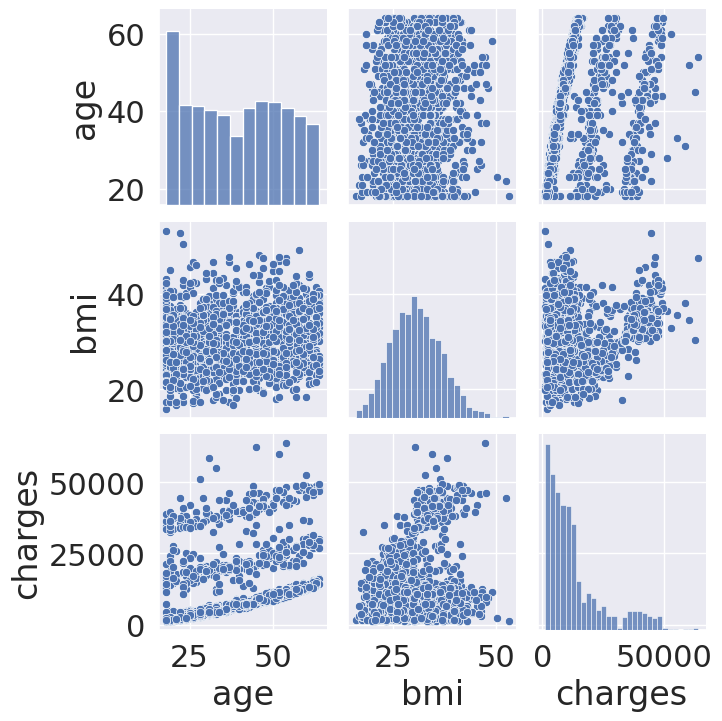

In [82]:
sns.pairplot(df)  #pairplot
plt.show()

* There's an interesting pattern between 'age' and 'charges. It is possible that for the same ailment, older people are charged more than the younger ones

# 2.Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't?

* Hint- Formulate a hypothesis and prove/disprove it

In [83]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

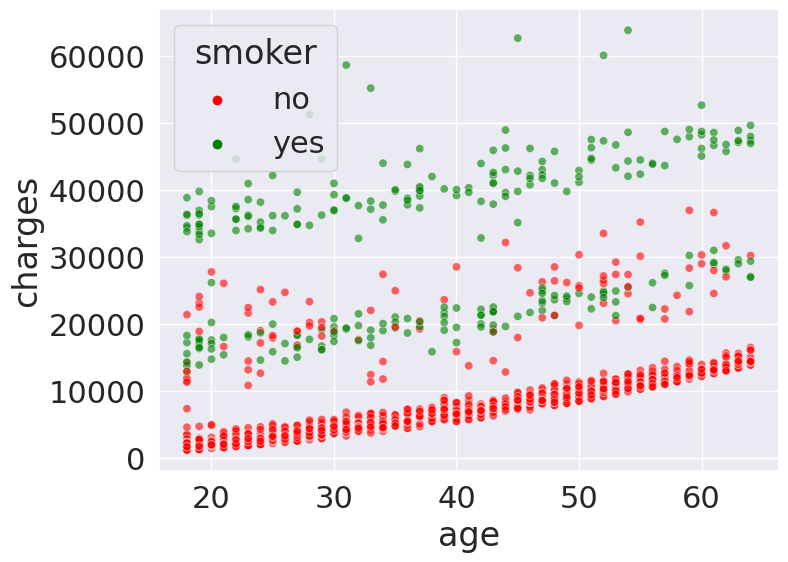

In [84]:
# Scatter plot to look for visual evidence of dependency between smoking and medical costs
# accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="age",y="charges",hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

* Visually the difference between charges of smokers and charges of non-smokers is apparent.
* The non-smokers have much lower medical bill claims compared to the smokers.
* We will have to perform a two sample t-test(independent) to test to check if the mean charges of smokers is significantly greater than the non-smokers.

### T-test to check dependency of charges on smoking attribute

Null Hypothesis = Ho = "Mean charges of smokers is less than or equal to non-smokers."

Alternate Hypothesis = Ha = "Mean charges of smokers is greater than non-smokers."

This will be a one-tailed t-test.

`Significance Level = 0.05`

In [85]:
Ho = "Mean charges of smokers is less than or equal to non-smokers"
Ha = "Mean charges of smokers is greater than non-smokers"


x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y)  # Performing an Independent t-test


In [86]:
# Since it is one tailed test
p_value=p_value/2
print("Tstat:",t,"P-value:",p_value)

Tstat: 46.66492117272371 P-value: 4.135717921089551e-283


#### Note: The value of the test statistic does not change for a two-tailed test or a one-tailed test. Only the pvalue or the probability value associated with the test statistic changes.

In [87]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Mean charges of smokers is greater than non-smokers as the p_value (4.135717921089551e-283) < 0.05


#### We have the statistical evidence to state that the medical claims made by smokers are higher than the claims made by non-smokers.

## 3.Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

In [88]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

#### Mean BMI of females in the data

In [89]:
np.mean(df[df.sex == 'female'].bmi)

30.37774924471299

#### Mean BMI of males in the data

In [90]:
np.mean(df[df.sex == 'male'].bmi)

30.943128698224854

In the sample,the mean BMI of males is greater than females. But we will need to perform a t-test to check if this result is statistically significant or just by random chance.

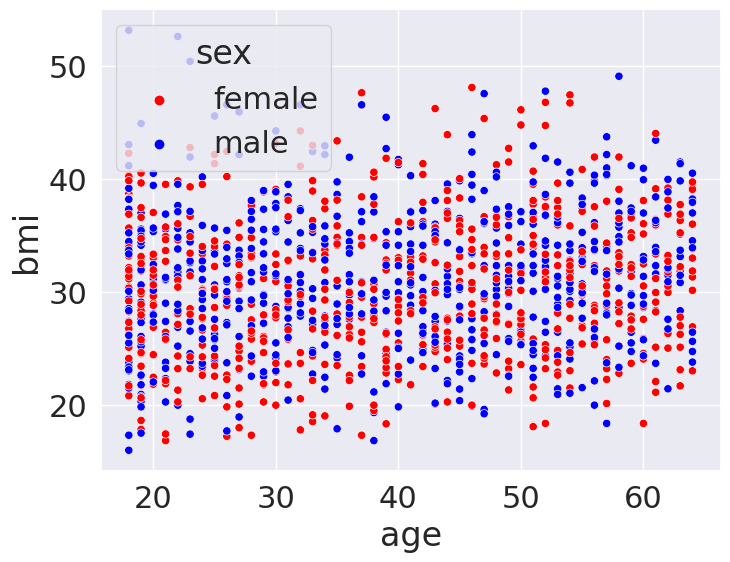

In [91]:
# Scatter plot to look for visual evidence of dependency between gender and BMI
# accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df,x="age",y="bmi",hue=df.sex,palette= ['red','blue'] )
plt.show()

* Visually, there is no apparent relation between gender and BMI

### T-test to check dependency of BMI on gender attribute

Null Hypothesis = Ho = "Mean BMI of females is same as that of males"

Alternate Hypothesis = Ha = "Mean BMI of females is different from males"

This will be a two-tailed t-test.

`Significance Level = 0.05`

In [92]:
# T-test to check dependency of bmi on gender
Ho = "BMI Females is same as BMI Males"   # Stating the Null Hypothesis
Ha = "BMI Females is different from BMI Males"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print("Reject the Null Hypothesis that the BMI Females same as that of BMI Males")
else:
    print("Failed to reject the Null Hypothesis that the BMI Females is same as that of BMI Males")

Failed to reject the Null Hypothesis that the BMI Females is same as that of BMI Males


##### There is no statistical difference in the BMI of males and females.

## 4. Is the proportion of smokers significantly different across different regions?

* Hint :
1. Create a contingency table/cross tab
2. Use the function : stats.chi2_contingency()

In [93]:
# Checking the distribution of smokers across different regions
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


<Axes: xlabel='smoker'>

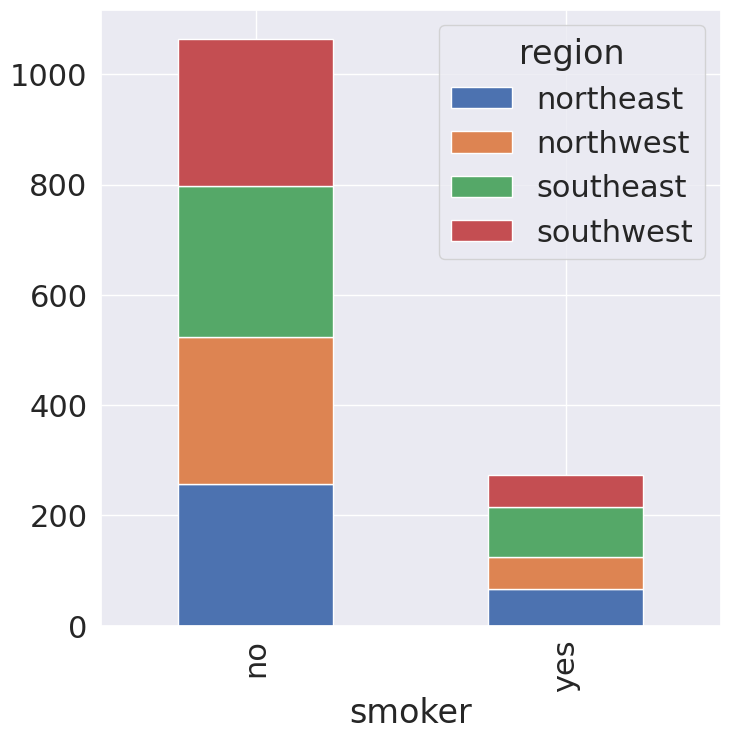

In [94]:
pd.crosstab(df['smoker'],df['region']).plot(kind="bar", figsize=(8,8),
                 stacked=True)

* The proportion of smokers in southeast region is higher than others.

### Chi-sq test to check if smoking habits are different for different regions

Null Hypothesis = Ho = "Region has no effect on smoking habits"

Alternate Hypothesis = Ha = "Region has an effect on smoking habits"

`Significance Level = 0.05`

In [95]:
# Chi_square test to check if smoking habits are different across different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['region'],df['smoker'])  # Contingency table of region and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


#### Proportion of smokers across different regions is same.

## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

In [96]:
# Checking the distribution of bmi across women with different number of children
df.groupby(['sex','children'])['bmi'].mean()

sex     children
female  0           30.361522
        1           30.052658
        2           30.649790
        3           30.436429
        4           31.943182
        5           30.620625
male    0           30.741719
        1           31.166145
        2           31.300992
        3           30.922937
        4           30.957500
        5           28.792500
Name: bmi, dtype: float64

* The BMI of women with 0, 1 and 2 children does not look very different, but we need to test if this difference is statistically significant or not.

## Aanalysis of variance test (ANOVA) to check if bmi values for females having different number of children, are significantly different

Null Hypothesis = Ho = "No. of children has no effect on bmi"

Alternate Hypothesis = Ha = "No. of children has an effect on bmi"

`Significance Level = 0.05`

In [97]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = df[df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


#### We failed to reject the Null Hypothesis. The mean BMI of women with different number of children is not statistically different.

## Conclusion

* The claims made by smoker are higher as compared to the non-smokers. We should create personalised policies for these customer categories.
* Very few people have more than 2 children. 75% of the people have 2 or less children. However number of children has no affect on BMI of the women insurance holders.
* BMI has a slight positive correlation with the medical claims.